

# 🛒 Sales Prediction for Big Mart Outlets 


 





### 1. Problem Statement

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

### 2. Data

Data is taken from Anlytics problem practice -  `Big Mart Sales Prediction` 

[Dataset](https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/#ProblemStatement)

### 3. Evaluation

**Root Mean Square Error** value is used to evaluate our model.

### 4. Features

##### Data Dictionary:

We have train (8523) and test (5681) data set, train data set has both input and output variable(s). You need to predict the sales for test data set.


---




Train file: CSV containing the item outlet information with sales value



 - Item_Identifier - Unique product ID
 - Item_Weight - 	Weight of product
 - Item_Fat_Content	 - Whether the product is low fat or not
 - Item_Visibility	- The % of total display area of all products in a store allocated to the particular product
 - Item_Type	- The category to which the product belongs
 - Item_MRP	- Maximum Retail Price (list price) of the product
 - Outlet_Identifier	- Unique store ID
 - Outlet_Establishment_Year	- The year in which store was established
 - Outlet_Size	- The size of the store in terms of ground area covered
 - Outlet_Location_Type	- The type of city in which the store is located
 - Outlet_Type	- Whether the outlet is just a grocery store or some sort of supermarket
 - Item_Outlet_Sales	- Sales of the product in the particular store. This is the outcome variable to be predicted.
 

---



Test file: CSV containing item outlet combinations for which sales need to be forecasted


 - Item_Identifier	- Unique product ID
 - Item_Weight	- Weight of product
 - Item_Fat_Content	- Whether the product is low fat or not
 - Item_Visibility	- The % of total display area of all products in a store allocated to the particular product
 - Item_Type	- The category to which the product belongs
 - Item_MRP	- Maximum Retail Price (list price) of the product
 - Outlet_Identifier	- Unique store ID
 - Outlet_Establishment_Year	- The year in which store was established
 - Outlet_Size	- The size of the store in terms of ground area covered
 - Outlet_Location_Type	- The type of city in which the store is located
 - Outlet_Type	- Whether the outlet is just a grocery store or some sort of supermarket




### Getting Data Ready

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
#importing our train data
data = pd.read_csv('/content/drive/MyDrive/walmart data/train_v9rqX0R.csv')
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
#let's check for missing values and datatypes
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
len(data)

8523

Let's convert our object/string datatypes into categorical features and filling missing values.

In [6]:
#converting object dtype into categorical features

for label,content in data.items():
  if pd.api.types.is_string_dtype(content):
    data[label] = content.astype('category').cat.as_ordered()


In [7]:
#checking category codes

data.Outlet_Type.cat.codes               

0       1
1       2
2       1
3       0
4       1
       ..
8518    1
8519    1
8520    1
8521    2
8522    1
Length: 8523, dtype: int8

In [8]:
data.dtypes

Item_Identifier              category
Item_Weight                   float64
Item_Fat_Content             category
Item_Visibility               float64
Item_Type                    category
Item_MRP                      float64
Outlet_Identifier            category
Outlet_Establishment_Year       int64
Outlet_Size                  category
Outlet_Location_Type         category
Outlet_Type                  category
Item_Outlet_Sales             float64
dtype: object

After converting data type into category, let's fill all missing values

In [9]:
#filling missing numeric values

for label,content in data.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      data[label] = content.fillna(content.median())

In [10]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
# now let's filling missing category values

for label,content in data.items():
  if not pd.api.types.is_numeric_dtype(content):
    data[label] = pd.Categorical(content).codes+1

In [12]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   int16  
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int8   
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int8   
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int8   
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int8   
 9   Outlet_Location_Type       8523 non-null   int8   
 10  Outlet_Type                8523 non-null   int8   
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int16(1), int64(1), int8(6)
memory usage: 399.6 KB


In [14]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,157,9.30,2,0.016047,5,249.8092,10,1999,2,1,2,3735.1380
1,9,5.92,3,0.019278,15,48.2692,4,2009,2,3,3,443.4228
2,663,17.50,2,0.016760,11,141.6180,10,1999,2,1,2,2097.2700
3,1122,19.20,3,0.000000,7,182.0950,1,1998,0,3,1,732.3800
4,1298,8.93,2,0.000000,10,53.8614,2,1987,1,3,2,994.7052


So our data is ready, Now let's go for modeling.


### Modeling

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR

In [16]:
#let's split X and y
np.random.seed(42)

X = data.drop('Item_Outlet_Sales',axis=1)
y = data['Item_Outlet_Sales']

#let's split train and test split for test dataset

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [17]:
len(X_train), len(X_test)

(6818, 1705)

In [18]:
len(y_train), len(y_test)

(6818, 1705)

In [19]:
#let's build a function for fitting our various model

models = {'RandomForestRegressor':RandomForestRegressor(),
          'Adaboost': AdaBoostRegressor(),
          'linear svr': SVR(kernel='linear'),
          'rbf svr': SVR(kernel='rbf'),
          'Ridge':Ridge()}

def fit_and_score(models,X_train,y_train,X_test,y_test):
  np.random.seed(42)
  for names,model in models.items():
    model.fit(X_train,y_train)
    scores = model.score(X_test,y_test)
    print(f'SCORES of {names}: {scores}')

In [20]:
fit_and_score(models=models,
              X_train = X_train,
              y_train = y_train,
              X_test = X_test,
              y_test = y_test)

SCORES of RandomForestRegressor: 0.5639848517676748
SCORES of Adaboost: 0.47850708493928074
SCORES of linear svr: 0.4978306587175135
SCORES of rbf svr: -0.02700175139158789
SCORES of Ridge: 0.5270452796799339


In [21]:
from sklearn.metrics import mean_squared_error

def rmse(y_test,y_preds):
  return np.sqrt(mean_squared_error(y_test,y_preds))

def predict_rmse(model,X_test,y_test):
  np.random.seed(42)
  for names,model in models.items():
    y_preds = model.predict(X_test)
    rmse_score = rmse(y_test,y_preds)
    print(f'RMSE score of {names}: {rmse_score}') 

In [22]:
predict_rmse(model=models,X_test=X_test,y_test=y_test)

RMSE score of RandomForestRegressor: 1088.612016049296
RMSE score of Adaboost: 1190.54698902972
RMSE score of linear svr: 1168.281317995985
RMSE score of rbf svr: 1670.7363701809106
RMSE score of Ridge: 1133.7886807933053


### Hypertuning our model


In [55]:
#let's hypertune our Random forest regressor and ridge model with randomized search CV and Grid searcg CV

from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

# let's make hyper parameter grids

rf_grids = {
 'max_depth': [10,  30, 40, 60, 70, 100, None],
 'max_features': ['auto', 'sqrt','log2',None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 300, 500, 700, 600, 1000]}

ridge_grids = {'alpha':[200, 230, 250,265, 270, 275, 290, 300, 500]}


In [24]:
#let's try ridge regressor
ridge_rs = RandomizedSearchCV(Ridge(),ridge_grids,cv=5,n_iter=30,verbose=True,random_state=42)
ridge_rs.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 9 is smaller than n_iter=30. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.3s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=False,
                                   random_state=None, solver='auto',
                                   tol=0.001),
                   iid='deprecated', n_iter=30, n_jobs=None,
                   param_distributions={'alpha': [200, 230, 250, 265, 270, 275,
                                                  290, 300, 500]},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring=None, verbose=True)

In [25]:
ridge_rs.best_params_

{'alpha': 200}

In [26]:
ridge_rs.score(X_test,y_test)

0.5250712505550433

In [56]:
# let's try random forest regressor
rf_rs = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1),rf_grids,cv=5,n_iter=10,verbose=True,random_state=42)
rf_rs.fit(X_train[:1000],y_train[:1000])

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.1min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=-1,
                   

In [57]:
rf_rs.best_params_

{'max_depth': 60,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 1000}

In [59]:
rf_rs.score(X_test[:1000],y_test[:1000])

0.6094014199460727

In [30]:
# Now let's try Grid Search CV only for Random Forest Regressor


In [60]:
gs_grids = {'max_depth': [40,60,70,80],
 'max_features': ['sqrt'],
 'min_samples_leaf':[ 2,4,6],
 'min_samples_split': [10,20,30],
 'n_estimators': [100,200,1000,500]}

In [61]:
gs_rf = GridSearchCV(RandomForestRegressor(n_jobs=-1),gs_grids,cv=5,verbose=True)
gs_rf.fit(X_test[:1000],y_test[:1000])

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed: 10.2min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [62]:
gs_rf.best_params_

{'max_depth': 70,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 200}

In [63]:
gs_rf.score(X_test[:1000],y_test[:1000])

0.7704937115394606

In [35]:
# That's pretty good score, we will now train our RandomForestRegressor model with best_params with all data
ideal_model = RandomForestRegressor(max_depth=40,max_features = 'sqrt', min_samples_leaf = 4, min_samples_split =  10,n_estimators = 100)
ideal_model.fit(X_train,y_train)
ideal_model.score(X_test,y_test)

0.6072932697792988

### Hypertuning Done
 
 So our baseline model gives score around `0.5639848517676748` but our hypertuned ideal model gives score `0.6079167212948553`. 
 So now let's get `rmse`

In [36]:
y_predictions = ideal_model.predict(X_test)

ideal_rmse = rmse(y_test,y_predictions)

In [37]:
ideal_rmse

1033.1336494852903

That's pretty good RSME, so now we will just save our model and predicts on real test data

### Saving Model

In [38]:
from joblib import dump,load
dump(ideal_model,'ideal_model.joblib')


['ideal_model.joblib']

In [39]:
load('ideal_model.joblib')

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=40, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

### Getting test data ready

In [40]:
test_data = pd.read_csv('/content/drive/MyDrive/walmart data/test_AbJTz2l.csv')
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


Let's check if this data having any missing values or object/string dtype

In [41]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [42]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


Now then we will do same with test data what we done with training data, so for that let's create preprocess function

In [43]:
def preprocess(data):
  #converting object dtype into categorical features

  for label,content in data.items():
    if pd.api.types.is_string_dtype(content):
      data[label] = content.astype('category').cat.as_ordered()

  #filling missing numeric values

  for label,content in data.items():
    if pd.api.types.is_numeric_dtype(content):
      if pd.isnull(content).sum():
        data[label] = content.fillna(content.median())

  # now let's filling missing category values

  for label,content in data.items():
    if not pd.api.types.is_numeric_dtype(content):
      data[label] = pd.Categorical(content).codes+1

  

In [44]:
preprocess(test_data)


In [45]:
test_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [46]:
test_data.dtypes

Item_Identifier                int16
Item_Weight                  float64
Item_Fat_Content                int8
Item_Visibility              float64
Item_Type                       int8
Item_MRP                     float64
Outlet_Identifier               int8
Outlet_Establishment_Year      int64
Outlet_Size                     int8
Outlet_Location_Type            int8
Outlet_Type                     int8
dtype: object

So our test data is ready to fitted by model.

### Predictions on Test Data

In [47]:
# let's instantiate our saved model
model = ideal_model

In [48]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1104,20.750,2,0.007565,14,107.8622,10,1999,2,1,2
1,1068,8.300,5,0.038428,5,87.3198,3,2007,0,2,2
2,1407,14.600,2,0.099575,12,241.7538,1,1998,0,3,1
3,810,7.315,2,0.015388,14,155.0340,3,2007,0,2,2
4,1185,12.500,3,0.118599,5,234.2300,6,1985,2,3,4


In [49]:
prediction_values  = model.predict(test_data)

In [50]:
prediction_values

array([1747.61495942, 1386.84115782,  578.59675173, ..., 1941.3780218 ,
       4427.01803538, 1404.58246689])

### Saving Predictions in .csv format

In [51]:
#getting original test_data for submission
test = pd.read_csv('/content/drive/MyDrive/walmart data/test_AbJTz2l.csv')

In [52]:
prediction_data = pd.DataFrame()
prediction_data['Item_Identifier'] = test['Item_Identifier']
prediction_data['Outlet_Identifier'] = test['Outlet_Identifier']
prediction_data['Item_Outlet_Sales'] = prediction_values

In [53]:
prediction_data.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1747.614959
1,FDW14,OUT017,1386.841158
2,NCN55,OUT010,578.596752
3,FDQ58,OUT017,2213.315875
4,FDY38,OUT027,5193.754701


In [54]:
from google.colab import files
prediction_data.to_csv('big-mart-sales-predictions.csv',index=False) 
files.download('big-mart-sales-predictions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Feature Importance

In [66]:
model.feature_importances_

array([0.04953408, 0.04262188, 0.00891561, 0.05859894, 0.02615645,
       0.48367046, 0.0708505 , 0.0553467 , 0.01642475, 0.02742053,
       0.16046011])

In [68]:
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

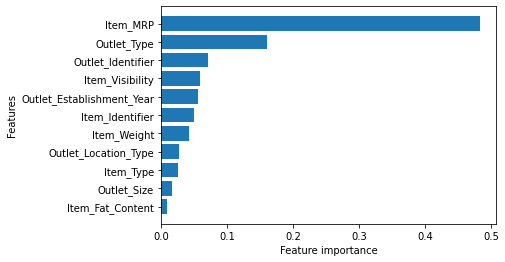

In [69]:
plot_features(X_train.columns, ideal_model.feature_importances_)

### END
